# *****PROJECT ON HOTEL RATING CLASSIFICATION*****

### DATASET : hotel_reviews

Text Mining is the process of deriving meaningful information from natural language text.

# *****1. Import Necessary libraries*****

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# *****2. Import Data*****

In [2]:
review_rating = pd.read_excel('hotel_reviews.xlsx')
review_rating

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

##### The Overall Goal is to turn the texts into data for analysis via application of Natural Language Processing (NLP) 

# *****3. Data Understanding*****

## 3.1 Initial Analysis :

In [3]:
review_rating.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [4]:
review_rating.tail()

Review  Rating
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

In [5]:
review_rating.shape

(20491, 2)

In [6]:
review_rating.isna().any()

Review    False
Rating    False
dtype: bool

In [7]:
review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
review_rating.isna().sum()

Review    0
Rating    0
dtype: int64

In [9]:
review_rating.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

In [10]:
review_rating.dtypes

Review    object
Rating     int64
dtype: object

In [11]:
review_rating.columns

Index(['Review', 'Rating'], dtype='object')

In [12]:
review_rating.groupby('Rating').describe()

Review                                                               
        count unique                                                top freq
Rating                                                                      
1        1421   1421  horrible customer service hotel stay february ...    1
2        1793   1793  ok nothing special charge diamond member hilto...    1
3        2184   2184  nice rooms not 4* experience hotel monaco seat...    1
4        6039   6039  nice hotel expensive parking got good deal sta...    1
5        9054   9054  unique, great stay, wonderful time hotel monac...    1

In [13]:
review_rating['Number of Characters']= review_rating['Review'].str.len()
review_rating

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

       Number of Characters  
0                       593  
1                      1689  
2                      1427  
3                       600  
4                      1281  
...                     ...  
20486                   733  
20487                   306  
20488                   443  
20489                  5557  
20490                   620  

[20491 rows x 3 columns]

##### 

# *****4. Analysing text statistics*****
Text statistics visualizations are simple but very insightful techniques and those really helps to explore the fundamental characteristics of the text data.

## 4.1 Number of Characters Present in Each Sentence of Reviews :

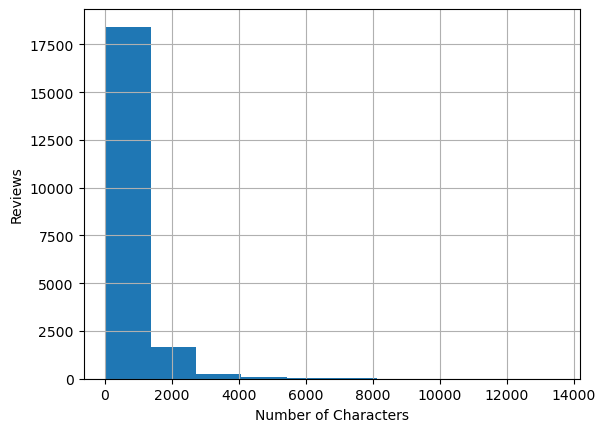

In [14]:
review_rating['Review'].str.len().hist()

plt.xlabel('Number of Characters')
plt.ylabel('Reviews')
plt.show()

##### The histogram shows that Hotel Reviews range from 1 to 6000 characters and generally more it is b/w 1 to 2000 characters.

##### 

## 4.2 Number of Words Appearing in Each Hotel Reviews :

In [15]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

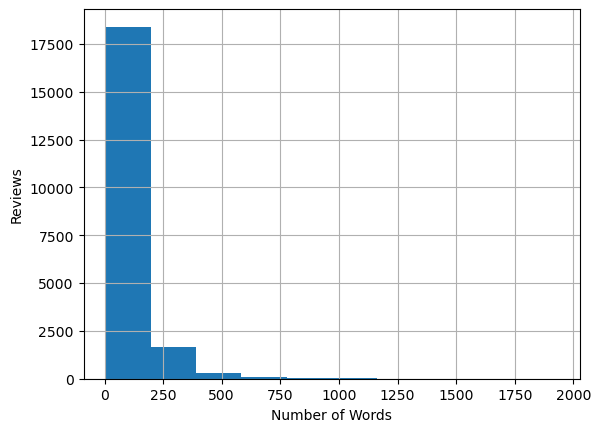

In [16]:
plot_word_number_histogram(review_rating['Review'])

plt.xlabel('Number of Words')
plt.ylabel('Reviews')
plt.show()

##### It is clear that the number of words in Hotel Reviews ranges from 1 to 750 and mostly falls b/w 1 to 250 words.

##### 

## 4.3 Check the Average Word Length in Each Sentence :

In [17]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

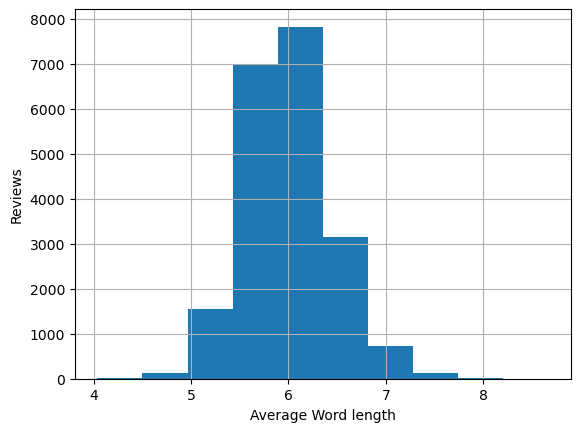

In [18]:
plot_word_length_histogram(review_rating['Review'])

plt.xlabel('Average Word length')
plt.ylabel('Reviews')
plt.show()

##### The average word length ranges b/w 4 to 8 with 6 being the most common length it means that people are using really short words in Hotel Reviews. Now lets find out!

##### 

## 4.4 Analyzing the Amount and the Types of Stopwords :
To get the corpus containing stopwords use the nltk library and Nltk contains stopwords from many languages. Since we are only dealing with English Reviews we will filter the English stopwords from the corpus.

In [19]:
import re
import nltk
from nltk.corpus import stopwords

In [20]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

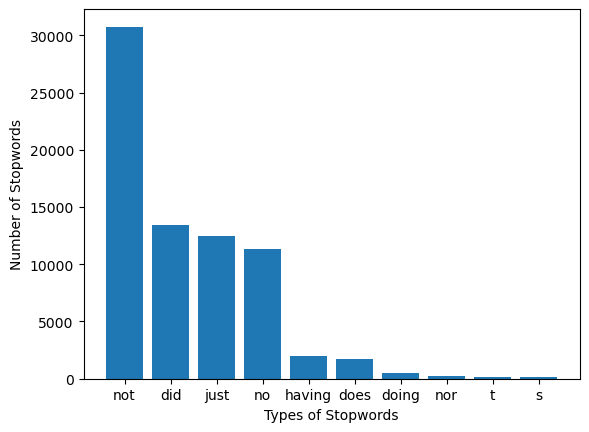

In [21]:
plot_top_stopwords_barchart(review_rating['Review'])

plt.xlabel('Types of Stopwords')
plt.ylabel('Number of Stopwords')
plt.show()

##### We can evidently see that stopwords such as 'not', 'did', 'just' and 'no' dominate in Hotel Reviews. So now we know which stopwords occur frequently in our text now lets inspect which words other than these stopwords occur frequently.

##### 

## 4.5 Word - Level Analysis :
Now we are using counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in NLP.

In [22]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [23]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

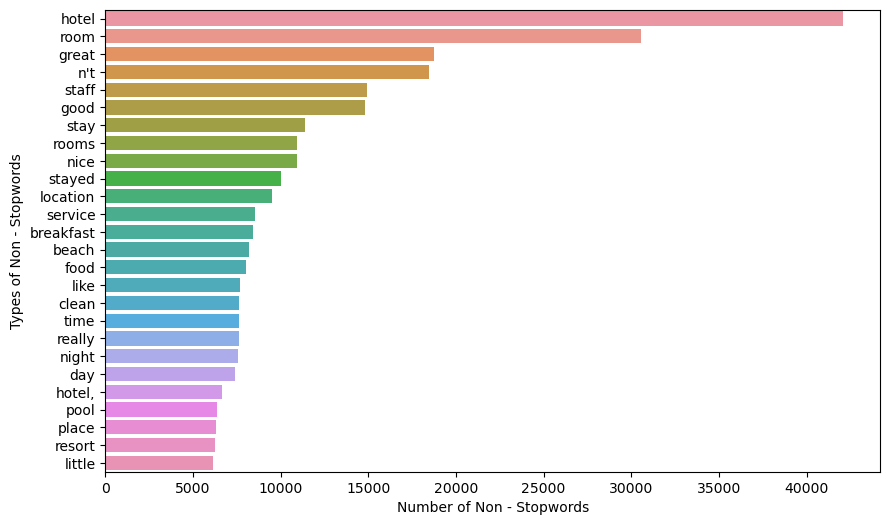

In [24]:
plt.figure(figsize = (10,6))
plot_top_non_stopwords_barchart(review_rating['Review'])

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('Types of Non - Stopwords')
plt.show()

##### The 'Hotel', 'room', 'great', 'staff'  etc. dominate the most words used by customers while giving the Hotel Reviews.

##### 

## 4.6 Ngram Exploration :

## A) 2 Words = Bigram

In [25]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [26]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

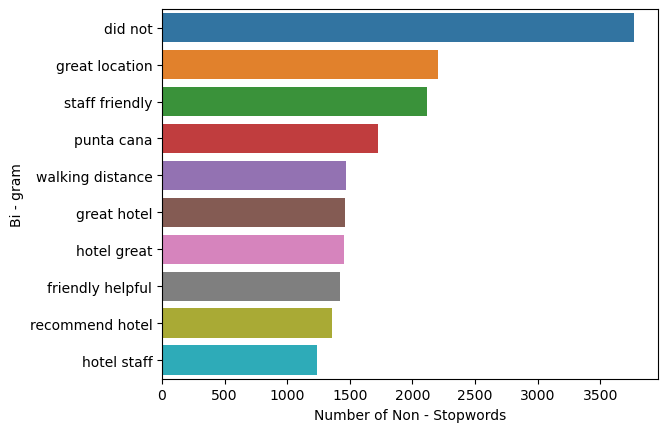

In [27]:
plot_top_ngrams_barchart(review_rating['Review'],2)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('Bi - gram')
plt.show()

##### We can observe that the bigrams such as 'great location', 'staff friendly' that are related to Hotel dominate the Hotel Reviews.

## B) 3 Words = Trigram

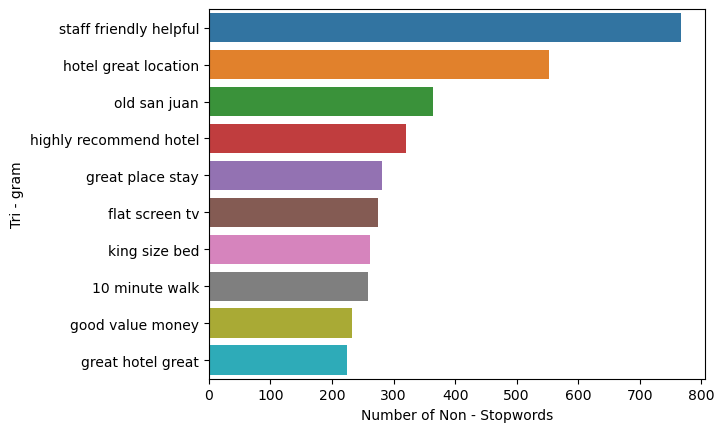

In [28]:
plot_top_ngrams_barchart(review_rating['Review'],3)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('Tri - gram')
plt.show()

##### We can observe that the bigrams such as 'staff friendly helpful', 'hotel great location' that are related to Hotel dominate the Hotel Reviews. It means that we should do some data cleaning Process and see if we are able to combine those related terms into one clean token.

##### 

## 4.7 Visualizing Hotel Ratings Using Pie Chart :

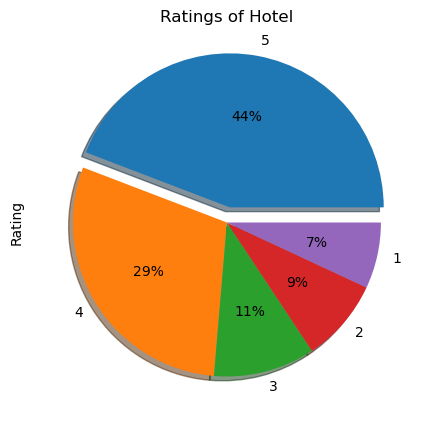

In [29]:
plt.figure(figsize=(5,5))
highlight =(0.1,0,0,0,0)

review_rating['Rating'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True,explode=highlight)
plt.title('Ratings of Hotel')
plt.show()

##### From the above pie chart as we can see that the Highest ratings for a Hotel from customers had got Rating of 5 Stars with 44% and Rating of 4 Stars with 29%.

## 4.8 Visualizing Hotel Ratings Using Countplot :

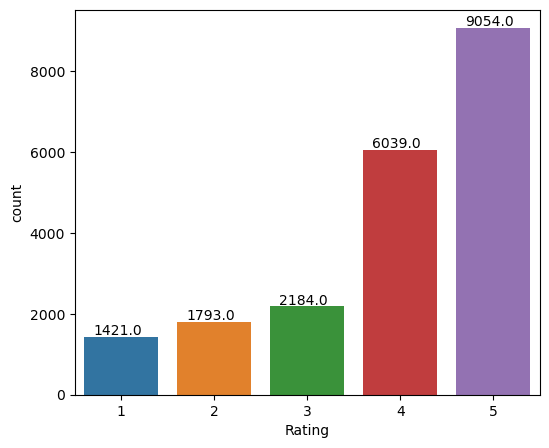

In [30]:
plt.figure( figsize=(6,5))
ax = sns.countplot(x='Rating', data=review_rating)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

##### From the given countplot as we can see that the 9054 customers had given rating 5 star and 6039 customers had given stars. 


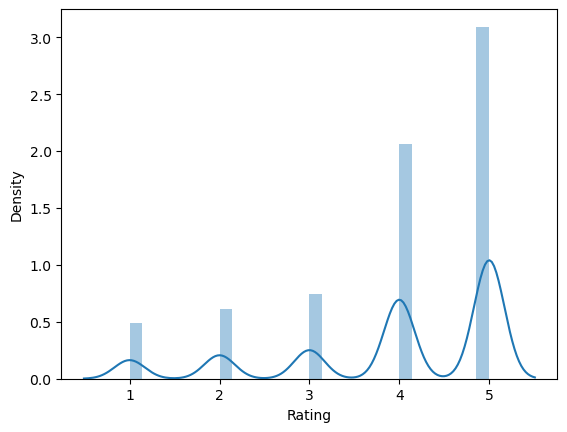

In [31]:
sns.distplot(review_rating['Rating'])
plt.show()

##### 

## 4.9 Generating Word Cloud For Hotel Rating :
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

## A) For 1 Star Rating :

In [32]:
from wordcloud import WordCloud

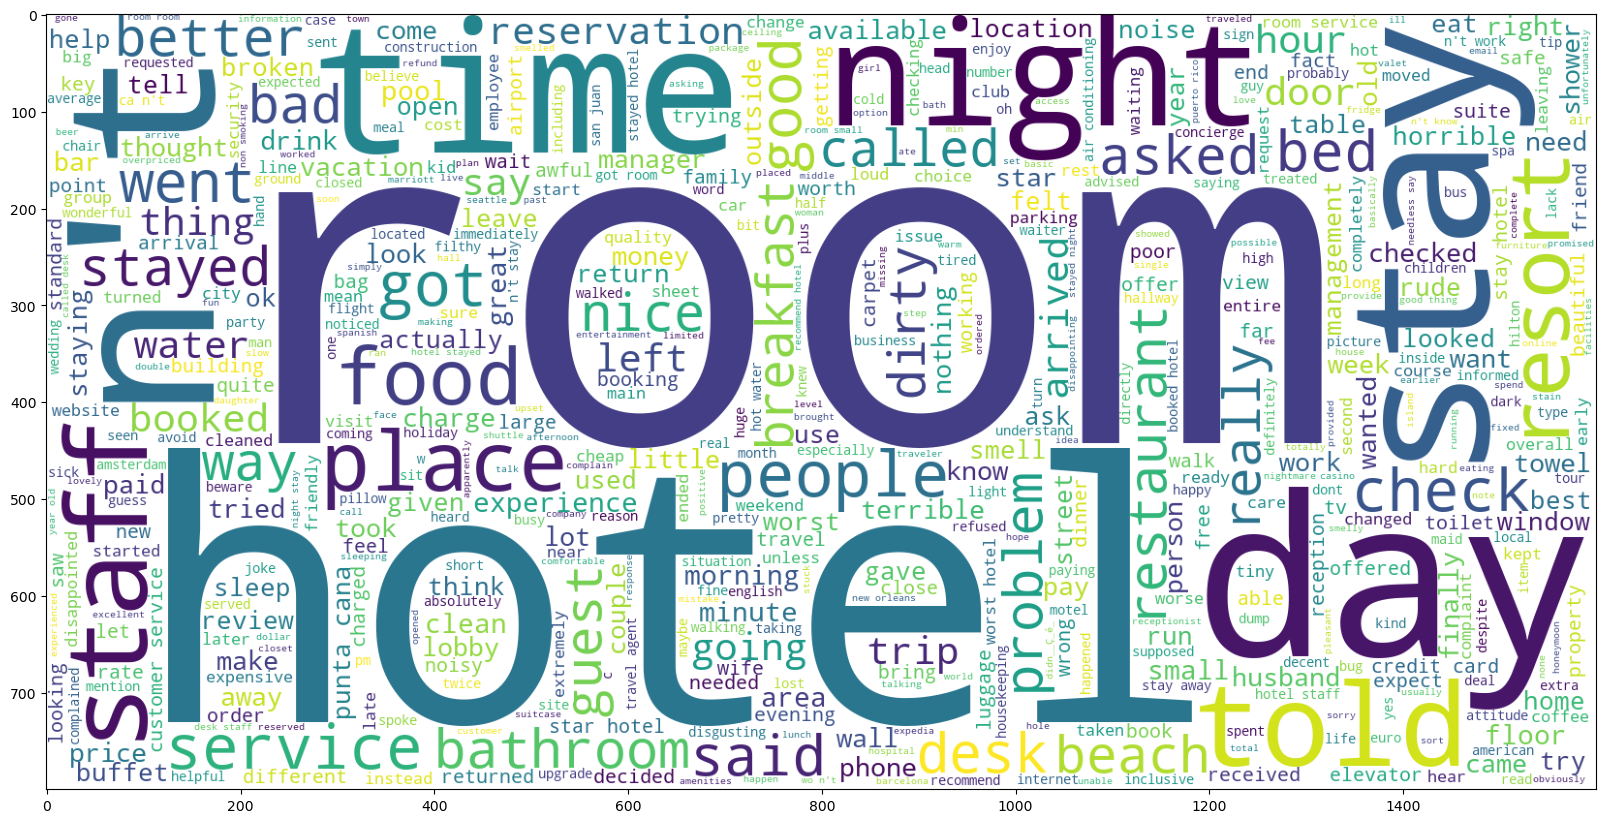

In [33]:
plt.figure(figsize=(20,20))
wc_1 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==1].Review))
plt.imshow(wc_1)
plt.show()

## B) For 2 Star Rating :

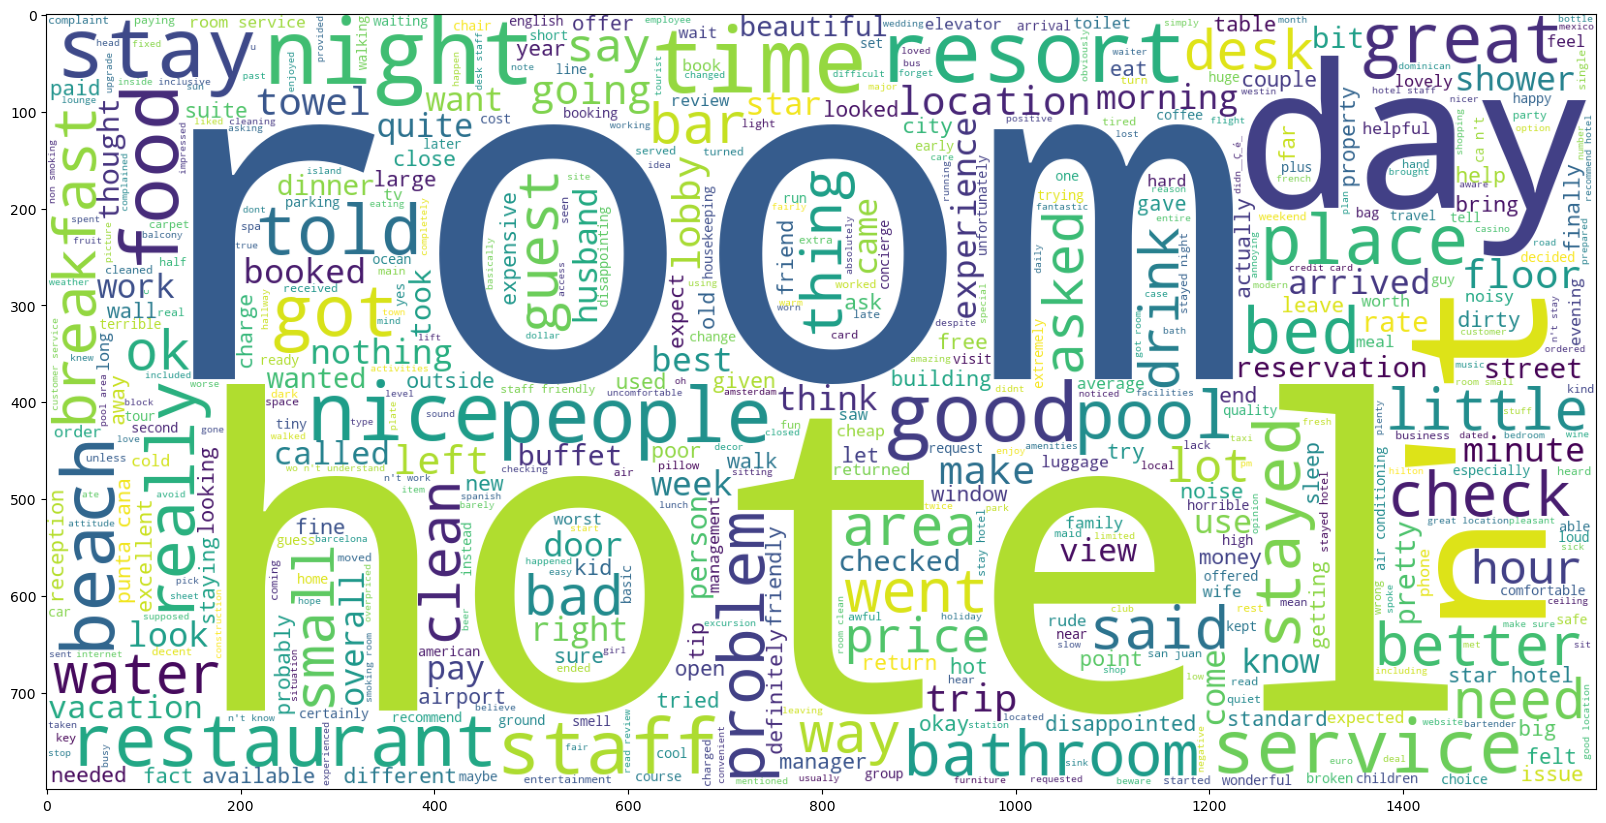

In [34]:
plt.figure(figsize=(20,20))
wc_2 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==2].Review))
plt.imshow(wc_2)
plt.show()

## C) For 3 Star Rating :

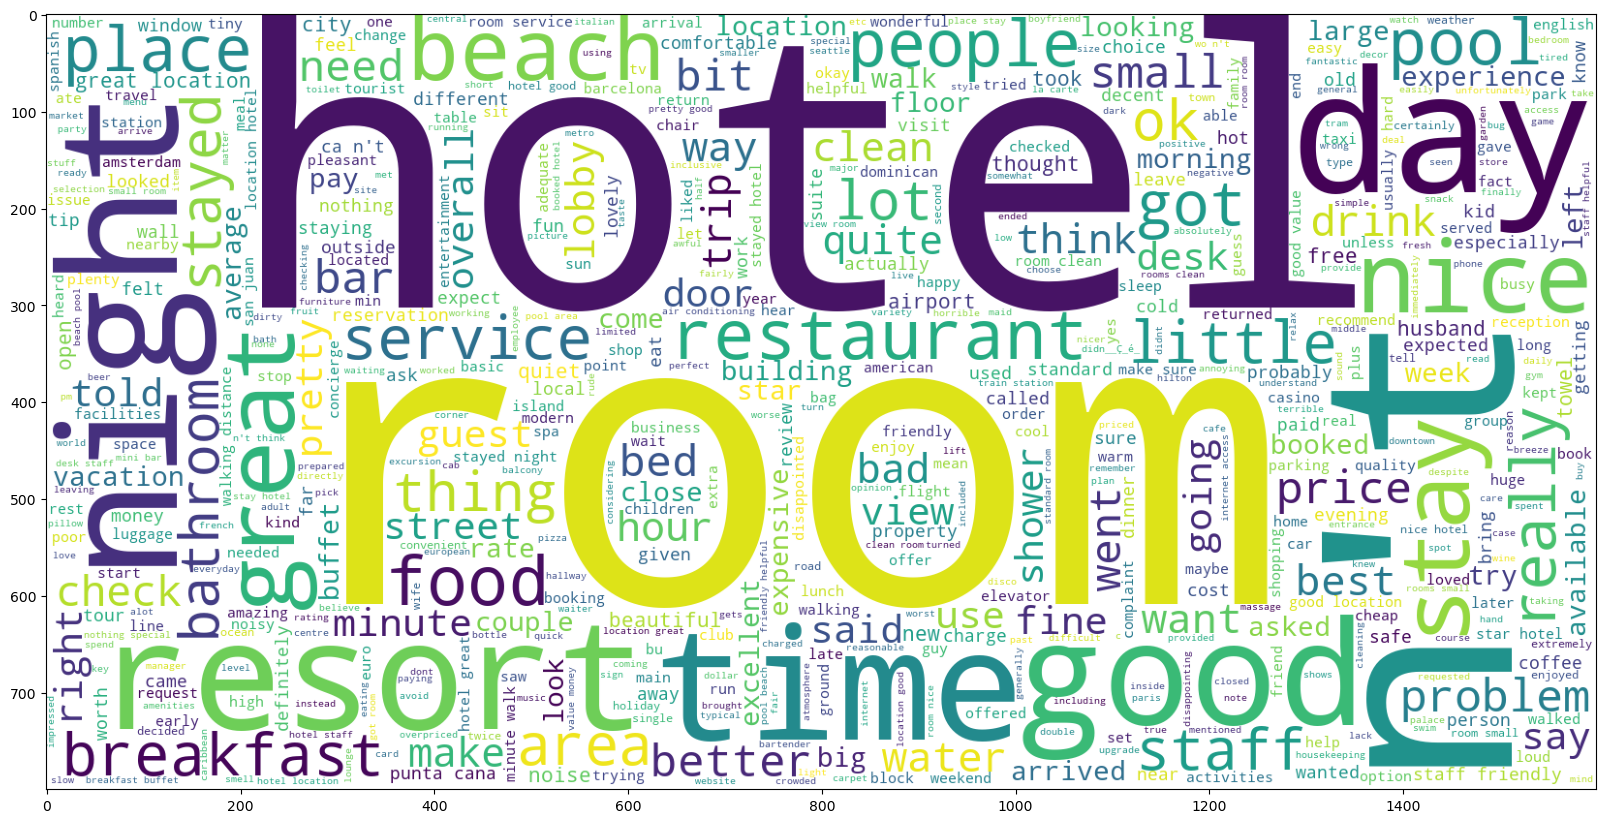

In [35]:
plt.figure(figsize=(20,20))
wc_3 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==3].Review))
plt.imshow(wc_3)
plt.show()

## D) For 4 Star Rating :

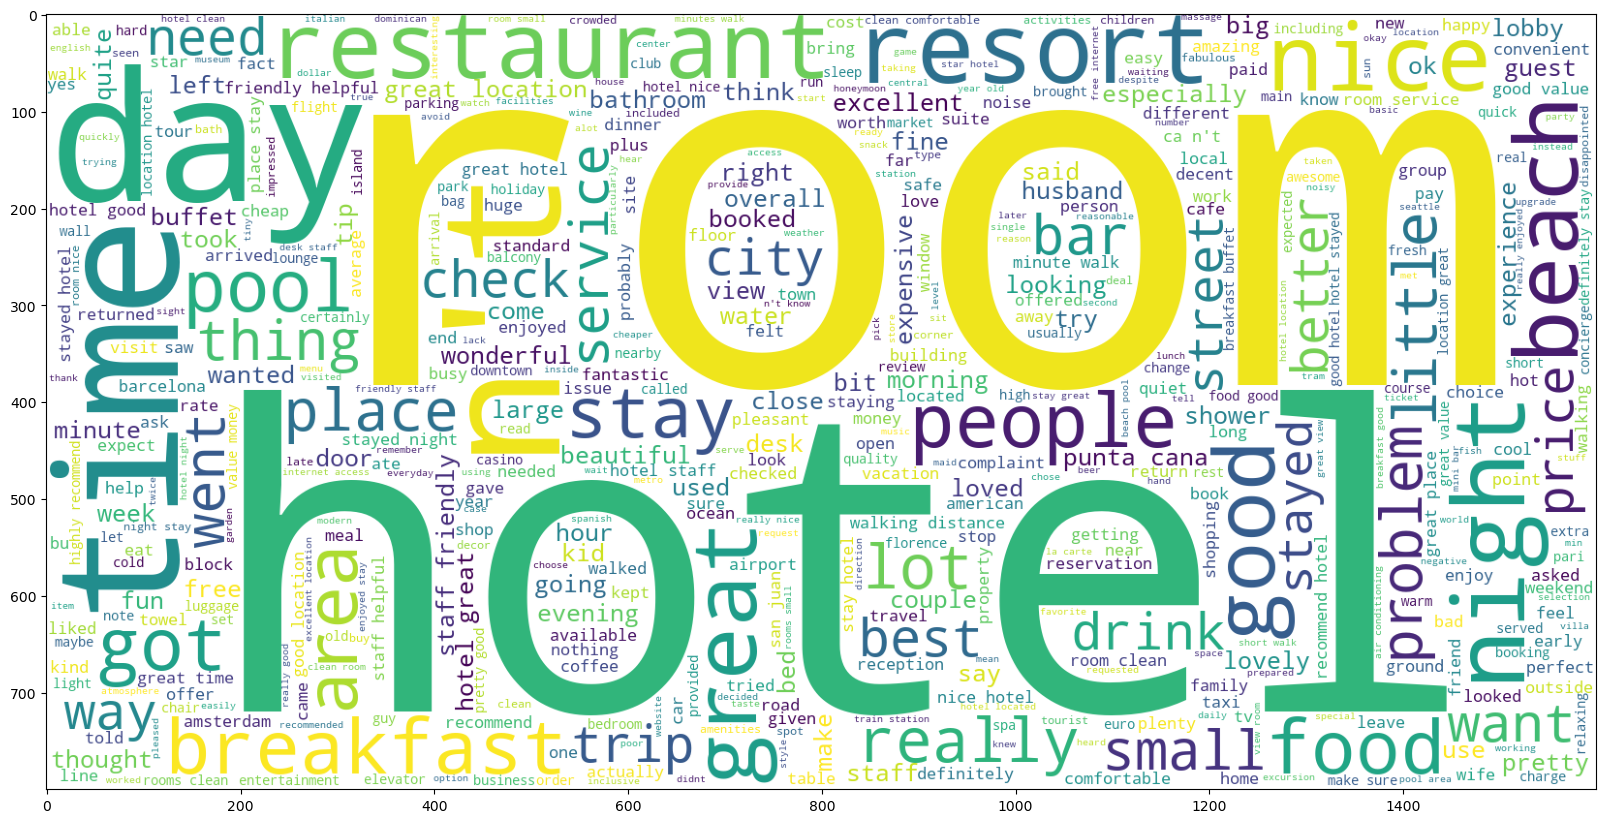

In [36]:
plt.figure(figsize=(20,20))
wc_4 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==4].Review))
plt.imshow(wc_4)
plt.show()

## E) For 5 Star Rating :

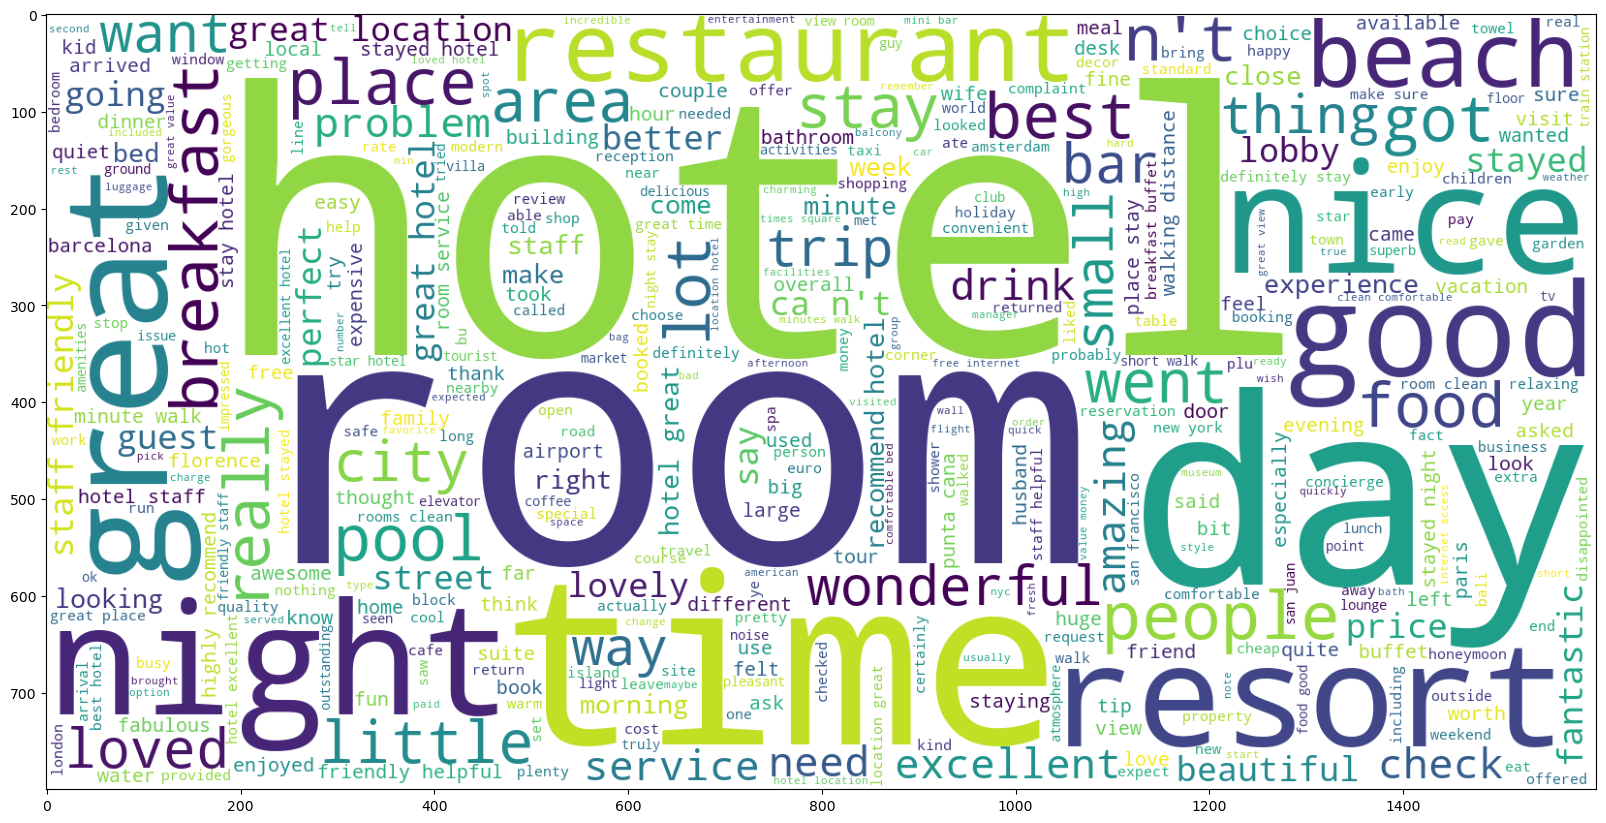

In [37]:
plt.figure(figsize=(20,20))
wc_5 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==5].Review))
plt.imshow(wc_5)
plt.show()

##### 

# *****5. Text Preprocessing*****
Cleaning or preprocessing the data is as important as model building if not more and when it comes to unstructured data like text this process is even more important.

## 5.1 Data Preprocess :

In [38]:
review_rating_1 = pd.read_excel('hotel_reviews.xlsx')
review_rating_1

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

## 5.2 Lower Casing :

In [39]:
review_rating_1['Text_Lower'] = review_rating_1['Review'].str.lower()
review_rating_1

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

                                              Text_Lower  
0      nice hotel expensive parking got good deal sta...  
1      ok nothing special charge diamond member hilto...  
2      nice rooms not 4* experience hotel monaco seat...  
3      unique, great stay, wonderful time hotel monac...  
4      great stay great stay, went seahawk game aweso...  
...                                                  ...  
20486  best kept secret 3rd time staying charm, not 5...  
20487  great location price view hotel great quick pl...  
20488  ok just looks nice modern outside, desk staff ...  
20489  hotel theft ruined vacation hotel opened sept ...  
20490  people talking, ca n't believe excellent ratin...  

[20491 rows x 3 columns]

## 5.3 Removal of Punctuations :

In [40]:
import string

In [41]:
review_rating_1.drop(['Review'], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

review_rating_1['Text_Removal_punctuations'] = review_rating_1['Text_Lower'].apply(lambda text: remove_punctuation(text))
review_rating_1

Rating                                         Text_Lower  \
0           4  nice hotel expensive parking got good deal sta...   
1           2  ok nothing special charge diamond member hilto...   
2           3  nice rooms not 4* experience hotel monaco seat...   
3           5  unique, great stay, wonderful time hotel monac...   
4           5  great stay great stay, went seahawk game aweso...   
...       ...                                                ...   
20486       5  best kept secret 3rd time staying charm, not 5...   
20487       4  great location price view hotel great quick pl...   
20488       2  ok just looks nice modern outside, desk staff ...   
20489       1  hotel theft ruined vacation hotel opened sept ...   
20490       2  people talking, ca n't believe excellent ratin...   

                               Text_Removal_punctuations  
0      nice hotel expensive parking got good deal sta...  
1      ok nothing special charge diamond member hilto...  
2      nice rooms not 4 experience hotel monaco seatt...  
3      unique great stay wonderful time hotel monaco ...  
4      great stay great stay went seahawk game awesom...  
...                                                  ...  
20486  best kept secret 3rd time staying charm not 5s...  
20487  great location price view hotel great quick pl...  
20488  ok just looks nice modern outside desk staff n...  
20489  hotel theft ruined vacation hotel opened sept ...  
20490  people talking ca nt believe excellent ratings...  

[20491 rows x 3 columns]

## 5.4 Removal of Stopwords :

In [42]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [43]:
review_rating_1.drop(['Text_Lower'], axis=1, inplace=True)

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

review_rating_1['Text_Removal_stopwords'] = review_rating_1['Text_Removal_punctuations'].apply(lambda text: 
                                                                                               remove_stopwords(text))
review_rating_1

Rating                          Text_Removal_punctuations  \
0           4  nice hotel expensive parking got good deal sta...   
1           2  ok nothing special charge diamond member hilto...   
2           3  nice rooms not 4 experience hotel monaco seatt...   
3           5  unique great stay wonderful time hotel monaco ...   
4           5  great stay great stay went seahawk game awesom...   
...       ...                                                ...   
20486       5  best kept secret 3rd time staying charm not 5s...   
20487       4  great location price view hotel great quick pl...   
20488       2  ok just looks nice modern outside desk staff n...   
20489       1  hotel theft ruined vacation hotel opened sept ...   
20490       2  people talking ca nt believe excellent ratings...   

                                  Text_Removal_stopwords  
0      nice hotel expensive parking got good deal sta...  
1      ok nothing special charge diamond member hilto...  
2      nice rooms 4 experience hotel monaco seattle g...  
3      unique great stay wonderful time hotel monaco ...  
4      great stay great stay went seahawk game awesom...  
...                                                  ...  
20486  best kept secret 3rd time staying charm 5star ...  
20487  great location price view hotel great quick pl...  
20488  ok looks nice modern outside desk staff nt par...  
20489  hotel theft ruined vacation hotel opened sept ...  
20490  people talking ca nt believe excellent ratings...  

[20491 rows x 3 columns]

## 5.5 Removal of Frequent words :

In [44]:
from collections import Counter

In [45]:
cnt = Counter()
for text in review_rating_1['Text_Removal_stopwords'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common()

[('hotel', 48832),
 ('room', 34300),
 ('great', 21087),
 ('nt', 18989),
 ('good', 16972),
 ('staff', 16203),
 ('stay', 15153),
 ('nice', 12399),
 ('rooms', 12015),
 ('location', 11032),
 ('stayed', 10466),
 ('service', 9961),
 ('time', 9816),
 ('beach', 9581),
 ('night', 9423),
 ('clean', 9359),
 ('day', 9340),
 ('breakfast', 9271),
 ('food', 8990),
 ('like', 8112),
 ('resort', 7914),
 ('really', 7763),
 ('place', 7689),
 ('pool', 7168),
 ('people', 6758),
 ('friendly', 6670),
 ('small', 6525),
 ('little', 6242),
 ('got', 6185),
 ('walk', 6090),
 ('excellent', 6008),
 ('area', 5927),
 ('2', 5689),
 ('best', 5675),
 ('helpful', 5454),
 ('restaurant', 5162),
 ('bar', 5106),
 ('bathroom', 4961),
 ('trip', 4922),
 ('restaurants', 4922),
 ('water', 4910),
 ('bed', 4848),
 ('recommend', 4848),
 ('beautiful', 4657),
 ('went', 4643),
 ('view', 4604),
 ('floor', 4572),
 ('comfortable', 4407),
 ('desk', 4398),
 ('5', 4343),
 ('3', 4326),
 ('nights', 4317),
 ('right', 4251),
 ('want', 4174),
 ('w

In [46]:
review_rating_1.drop(['Text_Removal_punctuations'], axis=1, inplace=True)

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

review_rating_1['Text_Removal_Frequentwords'] = review_rating_1['Text_Removal_stopwords'].apply(lambda text: 
                                                                                              remove_freqwords(text))
review_rating_1

Rating                             Text_Removal_stopwords  \
0           4  nice hotel expensive parking got good deal sta...   
1           2  ok nothing special charge diamond member hilto...   
2           3  nice rooms 4 experience hotel monaco seattle g...   
3           5  unique great stay wonderful time hotel monaco ...   
4           5  great stay great stay went seahawk game awesom...   
...       ...                                                ...   
20486       5  best kept secret 3rd time staying charm 5star ...   
20487       4  great location price view hotel great quick pl...   
20488       2  ok looks nice modern outside desk staff nt par...   
20489       1  hotel theft ruined vacation hotel opened sept ...   
20490       2  people talking ca nt believe excellent ratings...   

                              Text_Removal_Frequentwords  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      4 experience monaco seattle 4 levelpositives l...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret 3rd time staying charm 5star ...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept 17 2007 gues...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.6 Removal of Rare words :

In [47]:
review_rating_1.drop(['Text_Removal_stopwords'], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

review_rating_1['Text_Removal_Rarewords'] = review_rating_1['Text_Removal_Frequentwords'].apply(lambda text: 
                                                                                              remove_rarewords(text))
review_rating_1

Rating                         Text_Removal_Frequentwords  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  4 experience monaco seattle 4 levelpositives l...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret 3rd time staying charm 5star ...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept 17 2007 gues...   
20490       2  people talking ca believe excellent ratings ye...   

                                  Text_Removal_Rarewords  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      4 experience monaco seattle 4 levelpositives l...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret 3rd time staying charm 5star ...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept 17 2007 gues...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.7 Removal of Numbers :

In [48]:
review_rating_1.drop(['Text_Removal_Frequentwords'], axis=1, inplace=True)

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

review_rating_1['Text_Removal_Numbers'] = review_rating_1['Text_Removal_Rarewords'].apply(lambda text: remove_numbers(text))
review_rating_1

Rating                             Text_Removal_Rarewords  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  4 experience monaco seattle 4 levelpositives l...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret 3rd time staying charm 5star ...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept 17 2007 gues...   
20490       2  people talking ca believe excellent ratings ye...   

                                    Text_Removal_Numbers  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2       experience monaco seattle  levelpositives lar...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept   guests wee...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.8 Removal of White Spaces :

In [49]:
review_rating_1.drop(['Text_Removal_Rarewords'], axis=1, inplace=True)

def remove_whitespace(text):
    return  " ".join(text.split())

review_rating_1['Text_Removal_Whitespaces']=review_rating_1['Text_Removal_Numbers'].apply(remove_whitespace)
review_rating_1

Rating                               Text_Removal_Numbers  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3   experience monaco seattle  levelpositives lar...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept   guests wee...   
20490       2  people talking ca believe excellent ratings ye...   

                                Text_Removal_Whitespaces  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept guests week ...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.9 Removal of Single Characters :

In [50]:
review_rating_1.drop(['Text_Removal_Numbers'], axis=1, inplace=True)

def remove_single_char(text):
    """
    Return :- string after removing single characters
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

review_rating_1['Text_Removal_single_Characters'] = review_rating_1['Text_Removal_Whitespaces'].apply(lambda text: 
                                                                                                      remove_single_char(text))
review_rating_1

Rating                           Text_Removal_Whitespaces  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  experience monaco seattle levelpositives large...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept guests week ...   
20490       2  people talking ca believe excellent ratings ye...   

                          Text_Removal_single_Characters  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept guests week ...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.10 Removal of Emojis :

In [51]:
review_rating_1.drop(['Text_Removal_Whitespaces'], axis=1, inplace=True)

def remove_emojis(text):
    """
    Result :- string without any emojis in it
    Input :- String
    Output :- String
    """
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    without_emoji = emoji_pattern.sub(r'',text)
    return without_emoji

review_rating_1['Text_Removal_Emojis'] = review_rating_1['Text_Removal_single_Characters'].apply(lambda text: 
                                                                                                 remove_emojis(text))
review_rating_1

Rating                     Text_Removal_single_Characters  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  experience monaco seattle levelpositives large...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept guests week ...   
20490       2  people talking ca believe excellent ratings ye...   

                                     Text_Removal_Emojis  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept guests week ...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.11 Convert accented characters to ASCII characters :

In [52]:
import unidecode

In [53]:
review_rating_1.drop(['Text_Removal_single_Characters'], axis=1, inplace=True)

def accented_to_ascii(text):
    """
    Return :- text after converting accented characters
    Input :- string
    Output :- string
    """
    text = unidecode.unidecode(text)
    return text

review_rating_1['Text_ASCII'] = review_rating_1['Text_Removal_Emojis'].apply(lambda text: accented_to_ascii(text))
review_rating_1

Rating                                Text_Removal_Emojis  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  experience monaco seattle levelpositives large...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept guests week ...   
20490       2  people talking ca believe excellent ratings ye...   

                                              Text_ASCII  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept guests week ...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.12 Converting chat conversion words to normal words :

In [54]:
review_rating_1.drop(['Text_Removal_Emojis'], axis=1, inplace=True)

def short_to_original(text):
    """
    Return :- text after converting short_form words to original
    Input :- string
    Output :- string
    """
    chat_words_list = []
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

review_rating_1['Text_Covert_Normalwords'] = review_rating_1['Text_ASCII'].apply(lambda text: short_to_original(text))
review_rating_1

Rating                                         Text_ASCII  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  experience monaco seattle levelpositives large...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept guests week ...   
20490       2  people talking ca believe excellent ratings ye...   

                                 Text_Covert_Normalwords  
0      expensive parking got deal anniversary arrived...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      went seahawk game awesome downfall view buildi...  
...                                                  ...  
20486  best kept secret rd time staying charm star ca...  
20487  price view quick place sightsdirectly street s...  
20488  ok looks modern outside desk particularly frie...  
20489  theft ruined vacation opened sept guests week ...  
20490  people talking ca believe excellent ratings ye...  

[20491 rows x 3 columns]

## 5.13 Lemmatization & Tokenization :

In [55]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [56]:
review_rating_1.drop(['Text_ASCII'], axis=1, inplace=True)

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

review_rating_1['Text_Lemmatized'] = review_rating_1['Text_Covert_Normalwords'].apply(lambda text: lemmatize_word(text))
review_rating_1

Rating                            Text_Covert_Normalwords  \
0           4  expensive parking got deal anniversary arrived...   
1           2  ok nothing special charge diamond member hilto...   
2           3  experience monaco seattle levelpositives large...   
3           5  unique wonderful time monaco excellent short s...   
4           5  went seahawk game awesome downfall view buildi...   
...       ...                                                ...   
20486       5  best kept secret rd time staying charm star ca...   
20487       4  price view quick place sightsdirectly street s...   
20488       2  ok looks modern outside desk particularly frie...   
20489       1  theft ruined vacation opened sept guests week ...   
20490       2  people talking ca believe excellent ratings ye...   

                                         Text_Lemmatized  
0      [expensive, park, get, deal, anniversary, arri...  
1      [ok, nothing, special, charge, diamond, member...  
2      [experience, monaco, seattle, levelpositives, ...  
3      [unique, wonderful, time, monaco, excellent, s...  
4      [go, seahawk, game, awesome, downfall, view, b...  
...                                                  ...  
20486  [best, keep, secret, rd, time, stay, charm, st...  
20487  [price, view, quick, place, sightsdirectly, st...  
20488  [ok, look, modern, outside, desk, particularly...  
20489  [theft, ruin, vacation, open, sept, guests, we...  
20490  [people, talk, ca, believe, excellent, rat, ye...  

[20491 rows x 3 columns]

## 5.14 Converting List to String :

In [57]:
review_rating_1.drop(['Text_Covert_Normalwords'], axis=1, inplace=True)

def listToString(s):
    
    str1 = " " 
    return (str1.join(s))

review_rating_1['Clean_Review']=review_rating_1['Text_Lemmatized'].apply(lambda s: listToString(s))
review_rating_1

Rating                                    Text_Lemmatized  \
0           4  [expensive, park, get, deal, anniversary, arri...   
1           2  [ok, nothing, special, charge, diamond, member...   
2           3  [experience, monaco, seattle, levelpositives, ...   
3           5  [unique, wonderful, time, monaco, excellent, s...   
4           5  [go, seahawk, game, awesome, downfall, view, b...   
...       ...                                                ...   
20486       5  [best, keep, secret, rd, time, stay, charm, st...   
20487       4  [price, view, quick, place, sightsdirectly, st...   
20488       2  [ok, look, modern, outside, desk, particularly...   
20489       1  [theft, ruin, vacation, open, sept, guests, we...   
20490       2  [people, talk, ca, believe, excellent, rat, ye...   

                                            Clean_Review  
0      expensive park get deal anniversary arrive lat...  
1      ok nothing special charge diamond member hilto...  
2      experience monaco seattle levelpositives large...  
3      unique wonderful time monaco excellent short s...  
4      go seahawk game awesome downfall view build co...  
...                                                  ...  
20486  best keep secret rd time stay charm star ca be...  
20487  price view quick place sightsdirectly street s...  
20488  ok look modern outside desk particularly frien...  
20489  theft ruin vacation open sept guests week happ...  
20490  people talk ca believe excellent rat yes patri...  

[20491 rows x 3 columns]

## 5.15 Reindexing Column :

In [58]:
review_rating_1.drop(['Text_Lemmatized'], axis=1, inplace=True)

new_cols = ['Clean_Review','Rating']
review_rating_1=review_rating_1.reindex(columns=new_cols)
review_rating_1

Clean_Review  Rating
0      expensive park get deal anniversary arrive lat...       4
1      ok nothing special charge diamond member hilto...       2
2      experience monaco seattle levelpositives large...       3
3      unique wonderful time monaco excellent short s...       5
4      go seahawk game awesome downfall view build co...       5
...                                                  ...     ...
20486  best keep secret rd time stay charm star ca be...       5
20487  price view quick place sightsdirectly street s...       4
20488  ok look modern outside desk particularly frien...       2
20489  theft ruin vacation open sept guests week happ...       1
20490  people talk ca believe excellent rat yes patri...       2

[20491 rows x 2 columns]

##### 

# *****6. Cleaned Reviews with Number of Characters*****

## 6.1 Before Preprocessing :

In [59]:
review_rating['Number of Characters']= review_rating['Review'].str.len()
review_rating

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

       Number of Characters  
0                       593  
1                      1689  
2                      1427  
3                       600  
4                      1281  
...                     ...  
20486                   733  
20487                   306  
20488                   443  
20489                  5557  
20490                   620  

[20491 rows x 3 columns]

## 6.2 After Preprocessing :

In [60]:
review_rating_1['Number of Characters']= review_rating_1['Clean_Review'].str.len()
review_rating_1

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

       Number of Characters  
0                       427  
1                      1408  
2                      1147  
3                       456  
4                      1028  
...                     ...  
20486                   635  
20487                   240  
20488                   356  
20489                  4517  
20490                   512  

[20491 rows x 3 columns]

In [61]:
def sentiment(review):
    if review>=3:
        return 'Positive'
    elif review==0:
        return 'Nutral'
    else:
        return 'Negative'
review_rating_1['Rating_Analysis']= review_rating_1['Rating'].apply(sentiment)
review_rating_1

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

       Number of Characters Rating_Analysis  
0                       427        Positive  
1                      1408        Negative  
2                      1147        Positive  
3                       456        Positive  
4                      1028        Positive  
...                     ...             ...  
20486                   635        Positive  
20487                   240        Positive  
20488                   356        Negative  
20489                  4517        Negative  
20490                   512        Negative  

[20491 rows x 4 columns]

##### 

# *****7. Sentiment Analysis using TextBlob*****

In [62]:
review_rating_SA = review_rating_1.copy()
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

       Number of Characters Rating_Analysis  
0                       427        Positive  
1                      1408        Negative  
2                      1147        Positive  
3                       456        Positive  
4                      1028        Positive  
...                     ...             ...  
20486                   635        Positive  
20487                   240        Positive  
20488                   356        Negative  
20489                  4517        Negative  
20490                   512        Negative  

[20491 rows x 4 columns]

## 7.1 Caluclating Subjectivity :
It talks about how subjective the opinion is

In [63]:
from textblob import TextBlob

In [64]:
review_rating_SA.drop(['Number of Characters'], axis=1, inplace=True)

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

review_rating_SA['Subjectivity'] = review_rating_SA['Clean_Review'].apply(getSubjectivity) 
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Subjectivity  
0            Positive      0.549231  
1            Negative      0.496743  
2            Positive      0.534127  
3            Positive      0.660256  
4            Positive      0.589752  
...               ...           ...  
20486        Positive      0.496784  
20487        Positive      0.400000  
20488        Negative      0.494569  
20489        Negative      0.537370  
20490        Negative      0.731429  

[20491 rows x 4 columns]

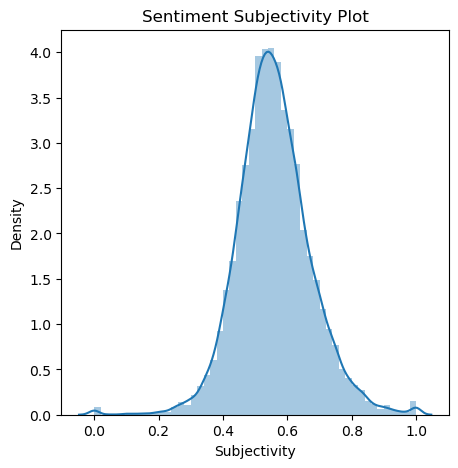

In [65]:
plt.figure(figsize = (5,5))
sns.distplot(review_rating_SA['Subjectivity'])
plt.title('Sentiment Subjectivity Plot')
plt.show()

##### You can see that the Subjectivity mainly ranges between 0 and 1 but the highest Subjectivity ranges between 0.4 to 0.8. This indicates that the majority of the Customers had given Good Opinions about Hotel.

## 7.2 Caluclating Polarity Score :
It talks about how positive or negative the opinion is

In [66]:
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

review_rating_SA['Polarity'] = review_rating_SA['Clean_Review'].apply(getPolarity)
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Subjectivity  Polarity  
0            Positive      0.549231  0.032683  
1            Negative      0.496743  0.134698  
2            Positive      0.534127  0.215306  
3            Positive      0.660256  0.460897  
4            Positive      0.589752  0.393478  
...               ...           ...       ...  
20486        Positive      0.496784  0.179107  
20487        Positive      0.400000  0.183333  
20488        Negative      0.494569  0.110340  
20489        Negative      0.537370  0.153488  
20490        Negative      0.731429  0.132738  

[20491 rows x 5 columns]

In [67]:
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

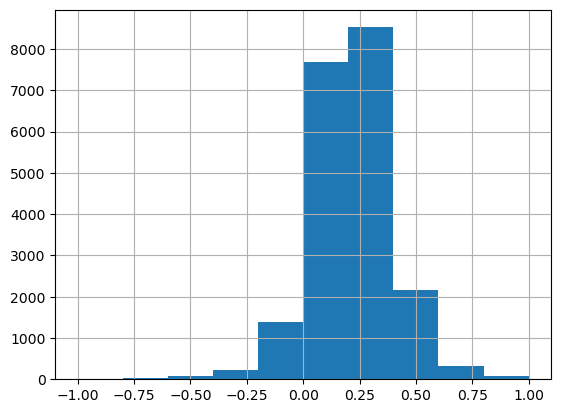

In [68]:
plot_polarity_histogram(review_rating_SA['Clean_Review'])

##### You can see that the polarity mainly ranges between -1 and 1 but the highest polarity ranges between 0.00 to 0.50. This indicates that the majority of the Hotel Reviews are Positive.

## 7.3 Line Plot For Textblob :

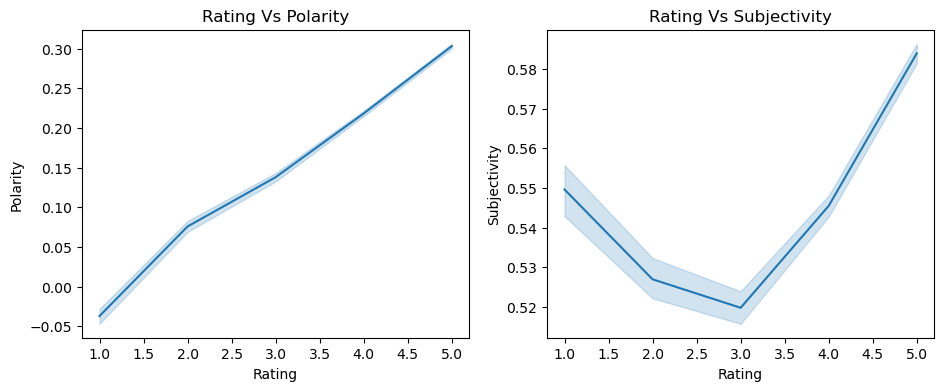

In [69]:
plt.figure(figsize = (11,4))

plt.subplot(1,2,1)
plt.title('Rating Vs Polarity')
sns.lineplot(y ='Polarity',x = 'Rating',data = review_rating_SA)

plt.subplot(1,2,2)
plt.title('Rating Vs Subjectivity')
sns.lineplot(y ='Subjectivity',x = 'Rating',data = review_rating_SA)

plt.show()

## 7.4 Analyzing the Reviews :

In [70]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
review_rating_SA['Review_Analysis'] = review_rating_SA['Polarity'].apply(analysis)
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Subjectivity  Polarity Review_Analysis  
0            Positive      0.549231  0.032683        Positive  
1            Negative      0.496743  0.134698        Positive  
2            Positive      0.534127  0.215306        Positive  
3            Positive      0.660256  0.460897        Positive  
4            Positive      0.589752  0.393478        Positive  
...               ...           ...       ...             ...  
20486        Positive      0.496784  0.179107        Positive  
20487        Positive      0.400000  0.183333        Positive  
20488        Negative      0.494569  0.110340        Positive  
20489        Negative      0.537370  0.153488        Positive  
20490        Negative      0.731429  0.132738        Positive  

[20491 rows x 6 columns]

In [71]:
def analysis(score):
    if score < 0:
        return '0'
    elif score == 0:
        return '1'
    else:
        return '2'
    
review_rating_SA['Review_Sentiment_1'] = review_rating_SA['Polarity'].apply(analysis)
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Subjectivity  Polarity Review_Analysis  \
0            Positive      0.549231  0.032683        Positive   
1            Negative      0.496743  0.134698        Positive   
2            Positive      0.534127  0.215306        Positive   
3            Positive      0.660256  0.460897        Positive   
4            Positive      0.589752  0.393478        Positive   
...               ...           ...       ...             ...   
20486        Positive      0.496784  0.179107        Positive   
20487        Positive      0.400000  0.183333        Positive   
20488        Negative      0.494569  0.110340        Positive   
20489        Negative      0.537370  0.153488        Positive   
20490        Negative      0.731429  0.132738        Positive   

      Review_Sentiment_1  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2  
...                  ...  
20486                  2  
20487                  2  
20488                  2  
20489                  2  
20490                  2  

[20491 rows x 7 columns]

In [72]:
Analysis_counts = review_rating_SA.Review_Analysis.value_counts()
Analysis_counts

Positive    18708
Negative     1715
Neutral        68
Name: Review_Analysis, dtype: int64

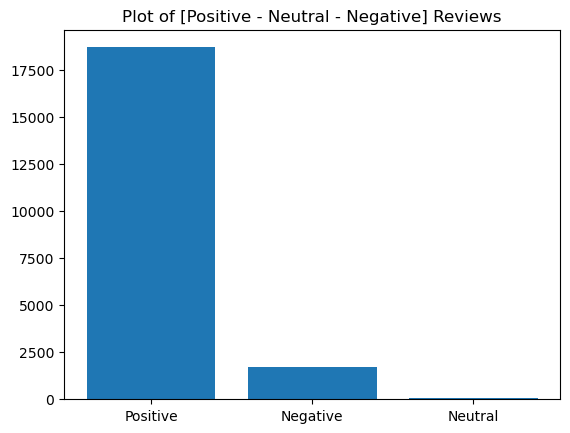

In [73]:
plt.bar(review_rating_SA.Review_Analysis.value_counts().index,
        review_rating_SA.Review_Analysis.value_counts())

plt.title('Plot of [Positive - Neutral - Negative] Reviews')
plt.show()

##### Yep 91.3 % of Reviews is Positive with only 8.4 % of Negative and 0.3 % of Neutral.

In [74]:
from sklearn.metrics import accuracy_score,classification_report

In [75]:
TB_accuracy = accuracy_score(review_rating_SA['Rating_Analysis'],review_rating_SA['Review_Analysis'])
TB_accuracy

0.8742862720218633

In [76]:
print(classification_report(review_rating_SA['Rating_Analysis'],review_rating_SA['Review_Analysis']))

              precision    recall  f1-score   support

    Negative       0.70      0.37      0.49      3214
     Neutral       0.00      0.00      0.00         0
    Positive       0.89      0.97      0.93     17277

    accuracy                           0.87     20491
   macro avg       0.53      0.45      0.47     20491
weighted avg       0.86      0.87      0.86     20491



##### 

# *****8. Sentiment Analysis Using VADER*****

In [77]:
review_rating_VA = review_rating_1.copy()
review_rating_VA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

       Number of Characters Rating_Analysis  
0                       427        Positive  
1                      1408        Negative  
2                      1147        Positive  
3                       456        Positive  
4                      1028        Positive  
...                     ...             ...  
20486                   635        Positive  
20487                   240        Positive  
20488                   356        Negative  
20489                  4517        Negative  
20490                   512        Negative  

[20491 rows x 4 columns]

## 8.1 Calculating Vader Sentiment :

In [78]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [79]:
review_rating_VA.drop(['Number of Characters'], axis=1, inplace=True)
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

review_rating_VA['Vader Sentiment'] = review_rating_VA['Clean_Review'].apply(vadersentimentanalysis)
review_rating_VA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Vader Sentiment  
0            Positive           0.8357  
1            Negative           0.9855  
2            Positive           0.9769  
3            Positive           0.9884  
4            Positive           0.9844  
...               ...              ...  
20486        Positive           0.9801  
20487        Positive           0.5994  
20488        Negative           0.7089  
20489        Negative           0.9897  
20490        Negative           0.9665  

[20491 rows x 4 columns]

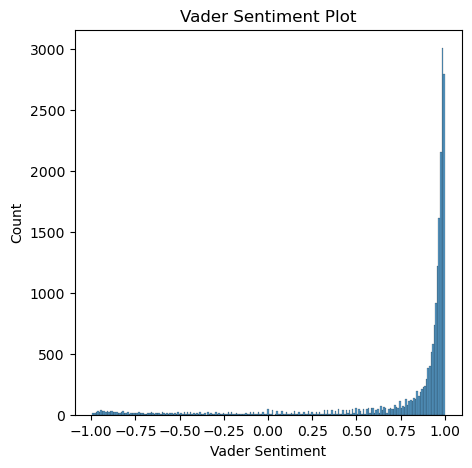

In [80]:
plt.figure(figsize = (5,5))
sns.histplot(review_rating_VA['Vader Sentiment'])
plt.title('Vader Sentiment Plot')
plt.show()

##### You can see that the Vader Sentiment mainly ranges between -1 and 1 but the highest Vader ranges between 0.75 to 1. This indicates that the majority of the Customers had given Good Opinions and positive Reviews about Hotel.

## 8.2 Line Plot for VADER :

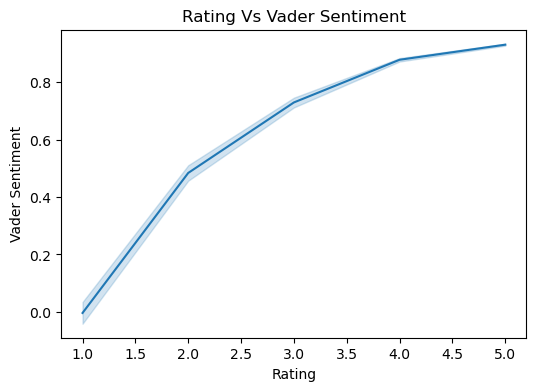

In [81]:
plt.figure(figsize = (6,4))
sns.lineplot(y ='Vader Sentiment',x = 'Rating',data = review_rating_VA)

plt.title('Rating Vs Vader Sentiment')
plt.show()

## 8.3 Analyzing the Reviews :

In [82]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
review_rating_VA['Review_Analysis'] = review_rating_VA['Vader Sentiment'].apply(vader_analysis)
review_rating_VA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Vader Sentiment Review_Analysis  
0            Positive           0.8357        Positive  
1            Negative           0.9855        Positive  
2            Positive           0.9769        Positive  
3            Positive           0.9884        Positive  
4            Positive           0.9844        Positive  
...               ...              ...             ...  
20486        Positive           0.9801        Positive  
20487        Positive           0.5994        Positive  
20488        Negative           0.7089        Positive  
20489        Negative           0.9897        Positive  
20490        Negative           0.9665        Positive  

[20491 rows x 5 columns]

In [83]:
def vader_analysis(compound):
    if compound >= 0.5:
        return '2'
    elif compound <= -0.5 :
        return '0'
    else:
        return '1'
    
review_rating_VA['Review_Sentiment_2'] = review_rating_VA['Vader Sentiment'].apply(vader_analysis)
review_rating_VA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Vader Sentiment Review_Analysis Review_Sentiment_2  
0            Positive           0.8357        Positive                  2  
1            Negative           0.9855        Positive                  2  
2            Positive           0.9769        Positive                  2  
3            Positive           0.9884        Positive                  2  
4            Positive           0.9844        Positive                  2  
...               ...              ...             ...                ...  
20486        Positive           0.9801        Positive                  2  
20487        Positive           0.5994        Positive                  2  
20488        Negative           0.7089        Positive                  2  
20489        Negative           0.9897        Positive                  2  
20490        Negative           0.9665        Positive                  2  

[20491 rows x 6 columns]

In [84]:
vader_counts = review_rating_VA['Review_Analysis'].value_counts()
vader_counts

Positive    18053
Neutral      1488
Negative      950
Name: Review_Analysis, dtype: int64

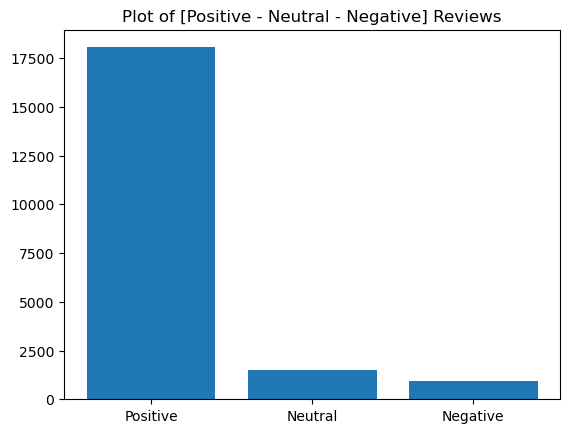

In [85]:
plt.bar(review_rating_VA.Review_Analysis.value_counts().index,
        review_rating_VA.Review_Analysis.value_counts())

plt.title('Plot of [Positive - Neutral - Negative] Reviews')
plt.show()

##### Yep 88.1 % of Reviews is Positive with only 4.6 % of Negative and 7.3 % of Neutral.

In [86]:
VA_accuracy = accuracy_score(review_rating_VA['Rating_Analysis'],review_rating_VA['Review_Analysis'])
VA_accuracy

0.8365623932458153

In [87]:
print(classification_report(review_rating_VA['Rating_Analysis'],review_rating_VA['Review_Analysis']))

              precision    recall  f1-score   support

    Negative       0.84      0.25      0.38      3214
     Neutral       0.00      0.00      0.00         0
    Positive       0.91      0.95      0.93     17277

    accuracy                           0.84     20491
   macro avg       0.58      0.40      0.44     20491
weighted avg       0.89      0.84      0.84     20491



##### 

# *****9. Visual Representation of TextBlob & VADER*****

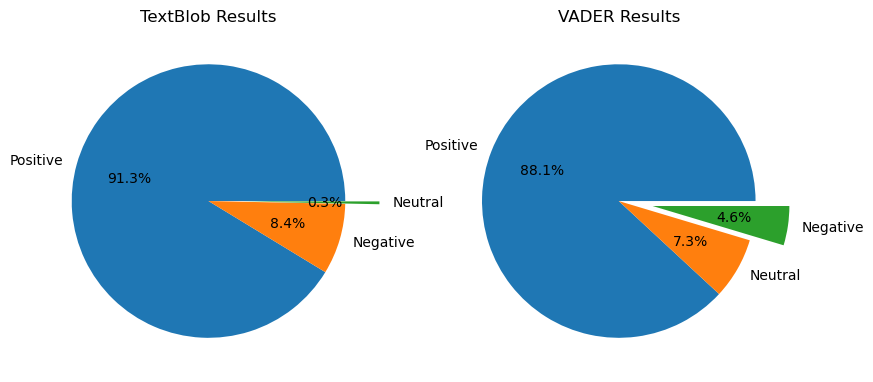

In [88]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.title('TextBlob Results')
plt.pie(Analysis_counts.values, labels = Analysis_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title('VADER Results')
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

##### As we can see from above pie chart comparing both textblob and VADER the best Analysis is Textblob analysis in which we got the result of most Positive Reviews of 91.3 %.

In [89]:
list = [['Textblob Sentiment',TB_accuracy],['VADER Sentiment',VA_accuracy]]

In [90]:
Result = pd.DataFrame(list, columns = ['Sentiment Analysis', 'Accuracy Values']) 
Result

Sentiment Analysis  Accuracy Values
0  Textblob Sentiment         0.874286
1     VADER Sentiment         0.836562

##### 

# *****10. Model Building*****

In [91]:
review_rating_SA

Clean_Review  Rating  \
0      expensive park get deal anniversary arrive lat...       4   
1      ok nothing special charge diamond member hilto...       2   
2      experience monaco seattle levelpositives large...       3   
3      unique wonderful time monaco excellent short s...       5   
4      go seahawk game awesome downfall view build co...       5   
...                                                  ...     ...   
20486  best keep secret rd time stay charm star ca be...       5   
20487  price view quick place sightsdirectly street s...       4   
20488  ok look modern outside desk particularly frien...       2   
20489  theft ruin vacation open sept guests week happ...       1   
20490  people talk ca believe excellent rat yes patri...       2   

      Rating_Analysis  Subjectivity  Polarity Review_Analysis  \
0            Positive      0.549231  0.032683        Positive   
1            Negative      0.496743  0.134698        Positive   
2            Positive      0.534127  0.215306        Positive   
3            Positive      0.660256  0.460897        Positive   
4            Positive      0.589752  0.393478        Positive   
...               ...           ...       ...             ...   
20486        Positive      0.496784  0.179107        Positive   
20487        Positive      0.400000  0.183333        Positive   
20488        Negative      0.494569  0.110340        Positive   
20489        Negative      0.537370  0.153488        Positive   
20490        Negative      0.731429  0.132738        Positive   

      Review_Sentiment_1  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2  
...                  ...  
20486                  2  
20487                  2  
20488                  2  
20489                  2  
20490                  2  

[20491 rows x 7 columns]

In [92]:
words = review_rating_1['Clean_Review']
words

0        expensive park get deal anniversary arrive lat...
1        ok nothing special charge diamond member hilto...
2        experience monaco seattle levelpositives large...
3        unique wonderful time monaco excellent short s...
4        go seahawk game awesome downfall view build co...
                               ...                        
20486    best keep secret rd time stay charm star ca be...
20487    price view quick place sightsdirectly street s...
20488    ok look modern outside desk particularly frien...
20489    theft ruin vacation open sept guests week happ...
20490    people talk ca believe excellent rat yes patri...
Name: Clean_Review, Length: 20491, dtype: object

## 10.1 Creating a bag-of-words model :

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [94]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(words).toarray()
y = review_rating_SA['Review_Sentiment_1']

## 10.2 Splitting into Training and Test sets :

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15368, 10000)
(15368,)
(5123, 10000)
(5123,)


##### 

# *****MODEL 1 - Logistic Regression*****

## A) Fitting the Model

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [97]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

## B) Predicting the Test set results

In [98]:
y_pred_LR = LR.predict(X_test)
y_pred_LR

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

## C) Accuracy of the Logistic Regression Algorithm

In [99]:
Acc_LR = accuracy_score(y_pred_LR, y_test)
print('Accuracy of Logestic Regression :', Acc_LR)

Accuracy of Logestic Regression : 0.9453445246925629


## D) Classification Report

In [100]:
report = classification_report(y_pred_LR, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.92      0.55       172
           1       0.00      0.00      0.00         0
           2       1.00      0.95      0.97      4951

    accuracy                           0.95      5123
   macro avg       0.46      0.62      0.51      5123
weighted avg       0.98      0.95      0.96      5123



## E) Making the Confusion Matrix 

In [101]:
CM_LR = confusion_matrix(y_test, y_pred_LR) 
CM_LR

array([[ 159,    0,  250],
       [   1,    0,   17],
       [  12,    0, 4684]], dtype=int64)

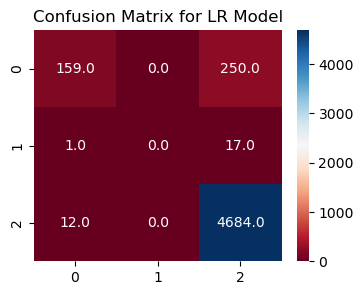

In [102]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LR Model")
plt.show()

# *****MODEL 2 - LightGBM Classifier Model*****

## A) Fitting the Model

In [103]:
from lightgbm import LGBMClassifier

In [104]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

## B) Predicting the Test set results

In [105]:
y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

## C) Accuracy of the LightGBM Classifier Algorithm

In [106]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.9576420066367363


## D) Classification Report

In [107]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       294
           1       0.00      0.00      0.00         0
           2       0.99      0.96      0.98      4829

    accuracy                           0.96      5123
   macro avg       0.54      0.61      0.56      5123
weighted avg       0.97      0.96      0.96      5123



## E) Making the Confusion Matrix

In [108]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 252,    0,  157],
       [   0,    0,   18],
       [  42,    0, 4654]], dtype=int64)

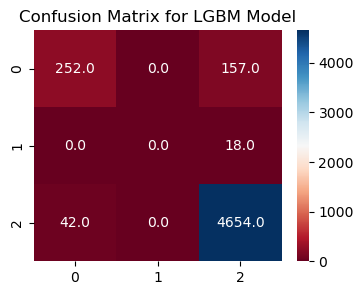

In [109]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# *****MODEL 3 - Gaussian Naive Bayes Model*****

## A) Fitting the Model

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

## B) Predicting the Test set results

In [112]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array(['2', '2', '2', ..., '2', '2', '0'], dtype='<U1')

## C) Accuracy of the GaussianNB Algorithm

In [113]:
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.8469646691391762


## D) Classification Report

In [114]:
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.22      0.28       667
           1       0.00      0.00      0.00         0
           2       0.89      0.94      0.92      4456

    accuracy                           0.85      5123
   macro avg       0.42      0.39      0.40      5123
weighted avg       0.82      0.85      0.83      5123



## E) Making the Confusion Matrix

In [115]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 150,    0,  259],
       [  10,    0,    8],
       [ 507,    0, 4189]], dtype=int64)

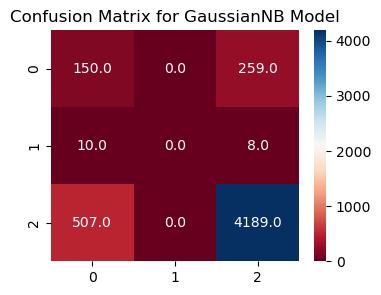

In [116]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# *****MODEL 4 - Multinomial Naive Bayes Model*****

## A) Fitting the Model

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

## B) Predicting the Test set results

In [119]:
y_pred_MNB = MNB.predict(X_test)
y_pred_MNB

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U1')

## C) Accuracy of the MultinomialNB Algorithm

In [120]:
Acc_MNB = accuracy_score(y_pred_MNB, y_test)
print('Accuracy of MultinomialNB :', Acc_MNB)

Accuracy of MultinomialNB : 0.9193831739215304


## D) Classification Report

In [121]:
report = classification_report(y_pred_MNB, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.03      1.00      0.07        14
           1       0.00      0.00      0.00         0
           2       1.00      0.92      0.96      5109

    accuracy                           0.92      5123
   macro avg       0.34      0.64      0.34      5123
weighted avg       1.00      0.92      0.96      5123



## E) Making the Confusion Matrix

In [122]:
CM_MNB = confusion_matrix(y_test, y_pred_MNB) 
CM_MNB

array([[  14,    0,  395],
       [   0,    0,   18],
       [   0,    0, 4696]], dtype=int64)

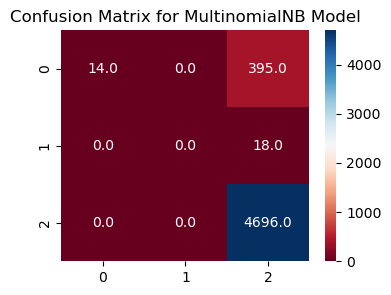

In [123]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_MNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for MultinomialNB Model")
plt.show()

# *****MODEL 5 - Decision Tree Classifier Model*****

## A) Fitting the Model

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

## B) Predicting the Test set results

In [126]:
y_pred_DTC = DTC.predict(X_test)
y_pred_DTC

array(['2', '2', '2', ..., '2', '2', '0'], dtype=object)

## C) Accuracy of the Decision Tree Classifier Algorithm

In [127]:
Acc_DTC = accuracy_score(y_pred_DTC, y_test)
print('Accuracy of Decision Tree Classifier :', Acc_DTC)

Accuracy of Decision Tree Classifier : 0.9051337107163772


## D) Classification Report

In [128]:
report = classification_report(y_pred_DTC, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.43      0.43       402
           1       0.00      0.00      0.00         6
           2       0.95      0.95      0.95      4715

    accuracy                           0.91      5123
   macro avg       0.46      0.46      0.46      5123
weighted avg       0.91      0.91      0.91      5123



## E) Making the Confusion Matrix

In [129]:
CM_DTC = confusion_matrix(y_test, y_pred_DTC) 
CM_DTC

array([[ 174,    0,  235],
       [   1,    0,   17],
       [ 227,    6, 4463]], dtype=int64)

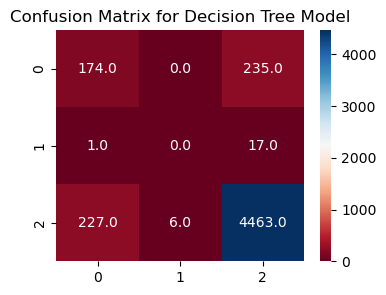

In [130]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_DTC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

# *****MODEL 6 - Random Forest Classifier Model*****

## A) Fitting the Model

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## B) Predicting the Test set results

In [133]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

## C) Accuracy of the Random Forest Classifier Algorithm

In [134]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.925434315830568


## D) Classification Report

In [135]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.11      1.00      0.20        45
           1       0.00      0.00      0.00         0
           2       1.00      0.92      0.96      5078

    accuracy                           0.93      5123
   macro avg       0.37      0.64      0.39      5123
weighted avg       0.99      0.93      0.95      5123



## E) Making the Confusion Matrix

In [136]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[  45,    0,  364],
       [   0,    0,   18],
       [   0,    0, 4696]], dtype=int64)

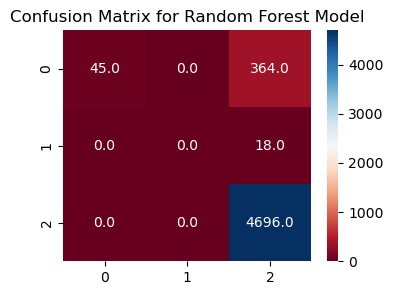

In [137]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# *****MODEL 7 - KNeighbors Classifier Model*****

## A) Fitting the Model

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(X_train,y_train).predict(X_train)

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

## B) Predicting the Test set results

In [140]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array(['2', '2', '2', ..., '2', '0', '2'], dtype=object)

## C) Accuracy of the KNeighbors Classifier Algorithm

In [141]:
Acc_KNN = accuracy_score(y_pred_KNN, y_test)
print('Accuracy of LightGBM Classifier :', Acc_KNN)

Accuracy of LightGBM Classifier : 0.8397423384735506


## D) Classification Report

In [142]:
report = classification_report(y_pred_KNN, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.24      0.30       685
           1       0.00      0.00      0.00        42
           2       0.88      0.94      0.91      4396

    accuracy                           0.84      5123
   macro avg       0.43      0.39      0.40      5123
weighted avg       0.81      0.84      0.82      5123



## E) Making the Confusion Matrix

In [143]:
CM_KNN = confusion_matrix(y_test, y_pred_KNN) 
CM_KNN

array([[ 163,    6,  240],
       [   1,    0,   17],
       [ 521,   36, 4139]], dtype=int64)

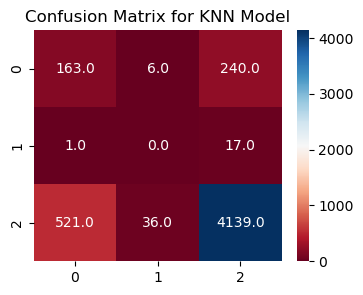

In [144]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_KNN, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for KNN Model")
plt.show()

# *****MODEL 8 - AdaBoost Classifier Model*****

## A) Fitting the Model

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train) 

AdaBoostClassifier()

## B) Predicting the Test set results

In [147]:
y_pred_ABC = ABC.predict(X_test)
y_pred_ABC

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

## C) Accuracy of the AdaBoost Classifier Algorithm

In [148]:
Acc_ABC = accuracy_score(y_pred_ABC, y_test)
print('Accuracy of AdaBoost Classifier :', Acc_ABC)

Accuracy of AdaBoost Classifier : 0.9340230333788796


## D) Classification Report

In [149]:
report = classification_report(y_pred_ABC, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.69      0.52       244
           1       0.00      0.00      0.00         7
           2       0.98      0.95      0.96      4872

    accuracy                           0.93      5123
   macro avg       0.47      0.55      0.49      5123
weighted avg       0.95      0.93      0.94      5123



## E) Making the Confusion Matrix

In [150]:
CM_ABC = confusion_matrix(y_test, y_pred_ABC)
CM_ABC

array([[ 169,    2,  238],
       [   0,    0,   18],
       [  75,    5, 4616]], dtype=int64)

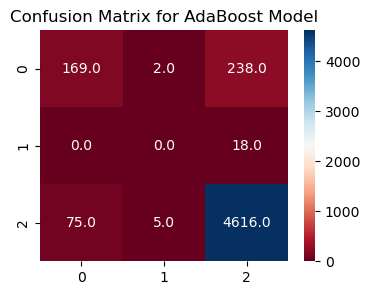

In [151]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_ABC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for AdaBoost Model")
plt.show()

##### 

# *****CONCLUSION*****

In [152]:
list = [['Logistic Regression',Acc_LR],['LightGBM Classifier',Acc_LGBM],['Gaussian Naive Bayes Model',Acc_GNB],
        ['Multinomial Naive Bayes',Acc_MNB],['Decision Tree Classifier',Acc_DTC],
        ['Random Forest Classifier',Acc_RFC],['KNeighbors Classifier',Acc_KNN],
        ['AdaBoost Classifier',Acc_ABC]]

In [153]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0         Logistic Regression  0.945345
1         LightGBM Classifier  0.957642
2  Gaussian Naive Bayes Model  0.846965
3     Multinomial Naive Bayes  0.919383
4    Decision Tree Classifier  0.905134
5    Random Forest Classifier  0.925434
6       KNeighbors Classifier  0.839742
7         AdaBoost Classifier  0.934023

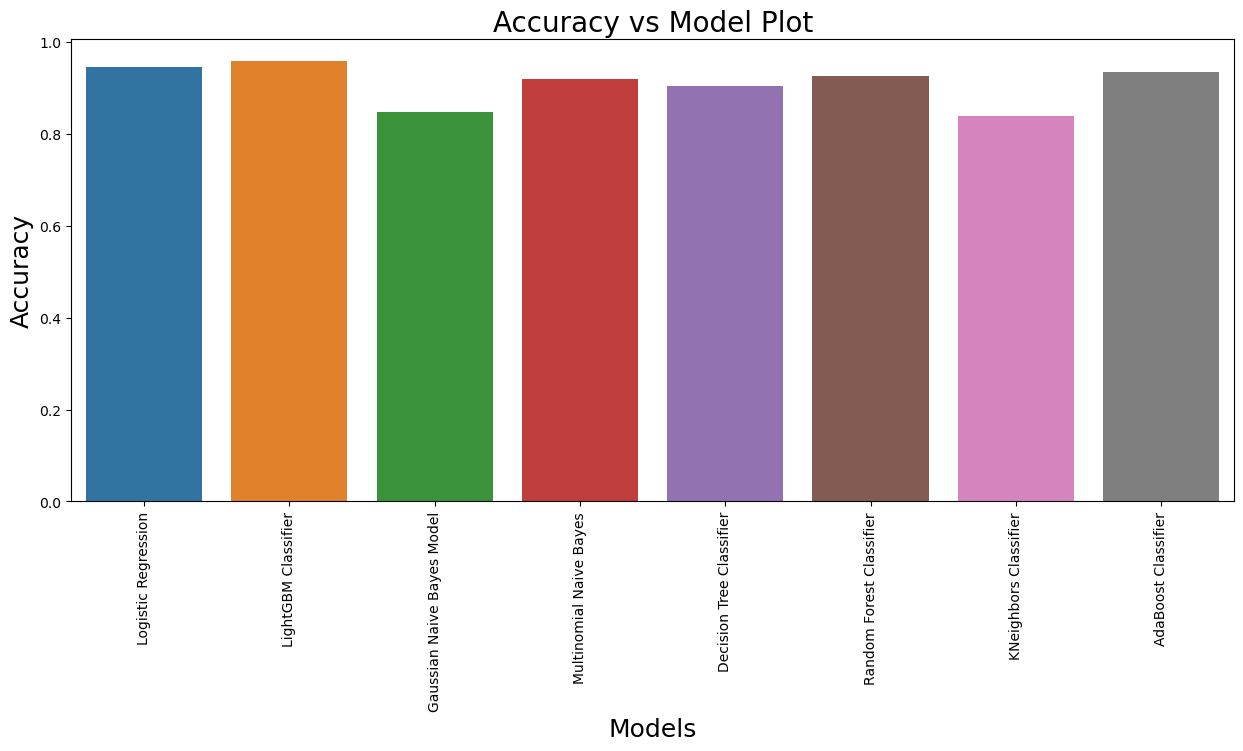

In [154]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

##### After comparing the performance & accuracy for all models, all performed well. Since, the LightGBM Classifier got more accuracy compare to other all models and it has higher precision & recall score we can finalise this model for our dataset.

##### 

# THE END

##### 

## Save The Models Using Pickle File

In [155]:
import pickle
from sklearn.datasets import load_diabetes

In [156]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [157]:
pickle.dump(LR, open('LR.pkl', 'wb'))

In [158]:
pickle.dump(LGBM, open('LGBM.pkl', 'wb'))

In [159]:
pickle.dump(GNB, open('GNB.pkl', 'wb'))

In [160]:
pickle.dump(MNB, open('MNB.pkl', 'wb'))

In [161]:
pickle.dump(DTC, open('DTC.pkl', 'wb'))

In [162]:
pickle.dump(RFC, open('RFC.pkl', 'wb'))

In [163]:
pickle.dump(KNN, open('KNN.pkl', 'wb'))

In [164]:
pickle.dump(ABC, open('ABC.pkl', 'wb'))

## Load the model from Pickle

In [165]:
pickled_model = pickle.load(open('LR.pkl', 'rb'))
pickled_model.predict(X_test)

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [166]:
# saving data into csv for model buiding pov
review_rating_1.to_csv('review_rating_1.csv')